In [20]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [24]:
# BEST SOLUTION

num_nodes = 16
num_additional_edges = 10


T = nx.random_tree(num_nodes)

G = nx.Graph(T)

for edge in G.edges():
    G[edge[0]][edge[1]]['weight'] = np.random.randint(1, 10) 

for _ in range(num_additional_edges):
    node1, node2 = np.random.choice(G.nodes(), size=2, replace=False)
    while G.has_edge(node1, node2):
        node1, node2 = np.random.choice(G.nodes(), size=2, replace=False)

    G.add_edge(node1, node2, weight=np.random.randint(1, 10))


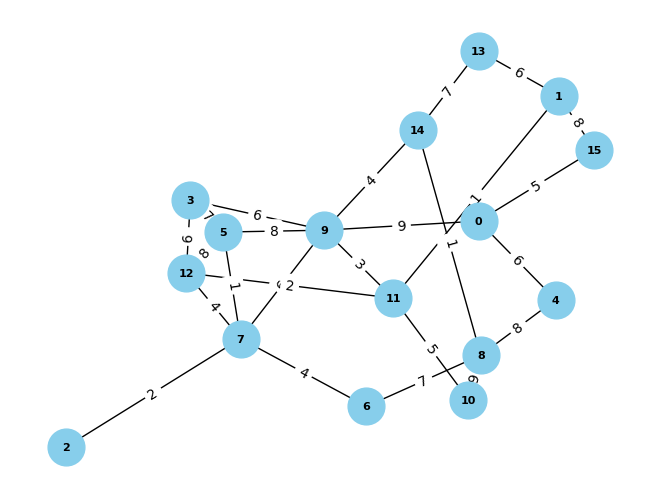

In [25]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=8)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

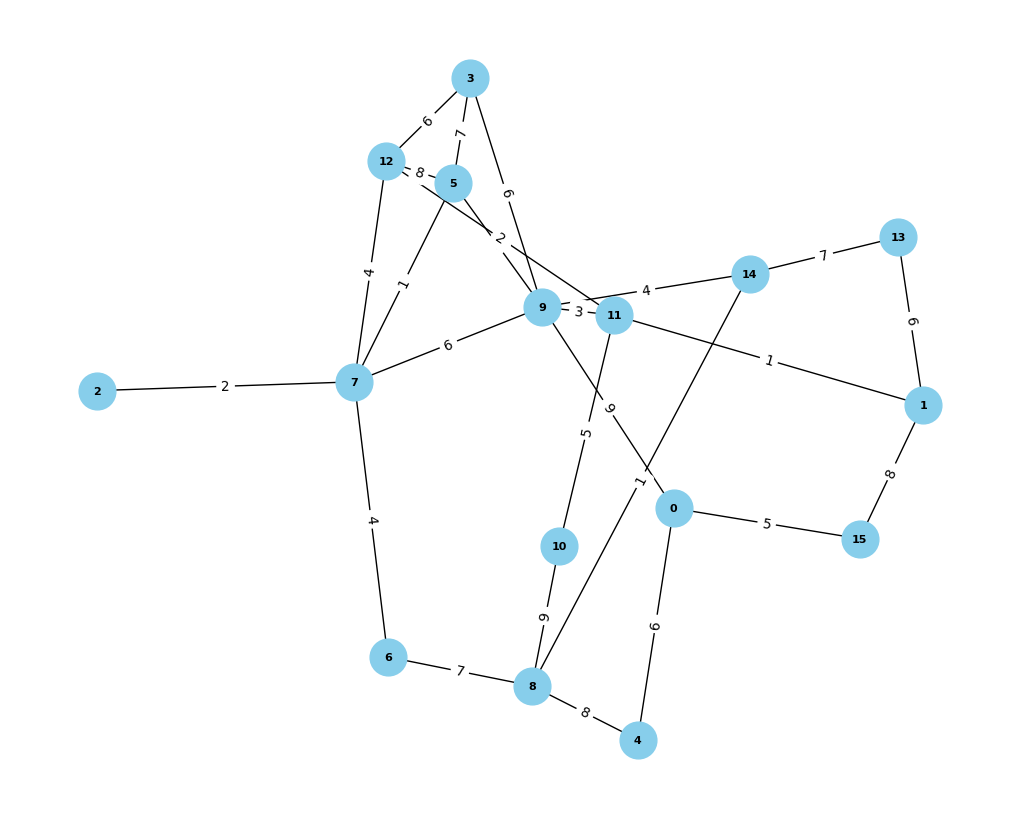

In [26]:
plt.figure(figsize=(10, 8))

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=8)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [27]:
adj_matrix = nx.to_numpy_matrix(G)

adj_matrix_np = np.array(adj_matrix)

print(adj_matrix_np)
for edge in G.edges(data=True):
    print(edge)

[[0. 0. 0. 0. 6. 0. 0. 0. 0. 9. 0. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 6. 0. 8.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 7. 0. 0. 0. 6. 0. 0. 6. 0. 0. 0.]
 [6. 0. 0. 0. 0. 0. 0. 0. 8. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 7. 0. 0. 0. 1. 0. 8. 0. 0. 8. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 4. 7. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 1. 4. 0. 0. 6. 0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 8. 0. 7. 0. 0. 0. 9. 0. 0. 0. 1. 0.]
 [9. 0. 0. 6. 0. 8. 0. 6. 0. 0. 0. 3. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 9. 0. 0. 5. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 3. 5. 0. 2. 0. 0. 0.]
 [0. 0. 0. 6. 0. 8. 0. 4. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 7. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 4. 0. 0. 0. 7. 0. 0.]
 [5. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(0, 4, {'weight': 6})
(0, 15, {'weight': 5})
(0, 9, {'weight': 9})
(1, 13, {'weight': 6})
(1, 11, {'weight': 1})
(1, 15, {'weight': 8})
(2, 7, {'weight': 2})
(3, 12, {'weight': 6})
(3

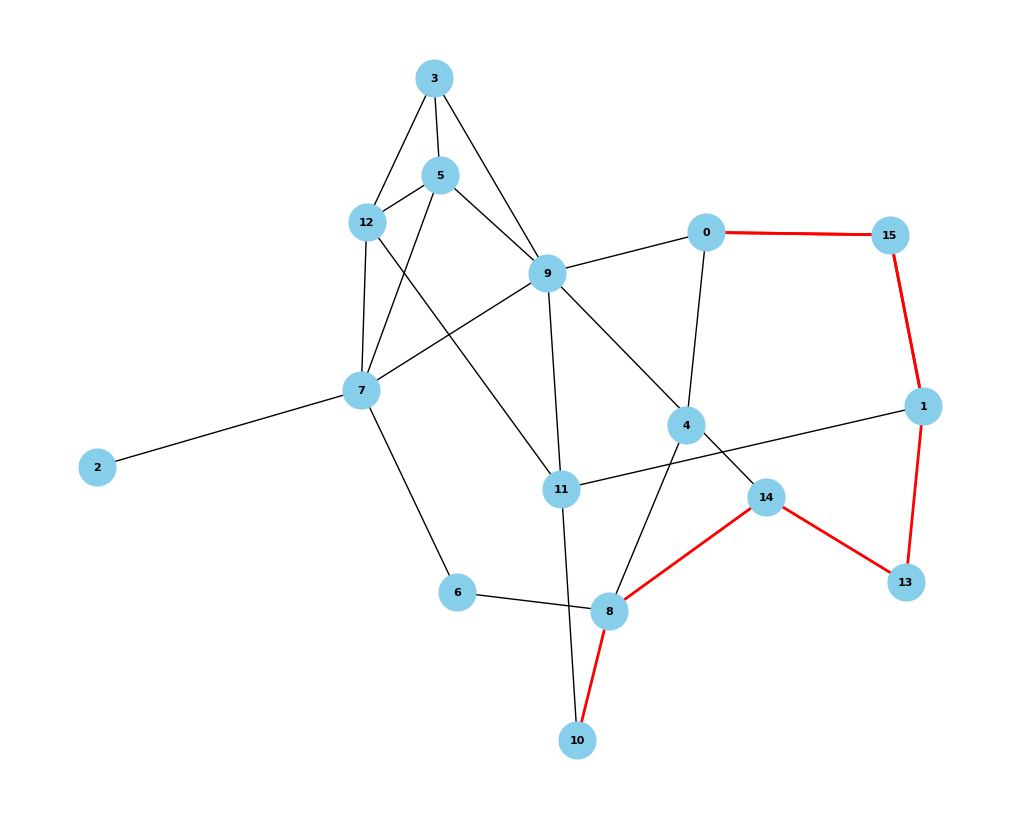

In [28]:
node_a = 1
node_b = 10

# Maximum length of the random walk
max_length = 8  # Adjust as needed

# Perform a random walk from node_a to node_b with maximum length
current_node = node_a
random_walk = [current_node]

while current_node != node_b and len(random_walk) < max_length:
    neighbors = list(G.neighbors(current_node))
    if not neighbors:
        break  # No neighbors, exit the loop
    current_node = random.choice(neighbors)
    random_walk.append(current_node)

# If the walk did not reach node_b, extend the walk to reach node_b
if current_node != node_b:
    shortest_path = nx.shortest_path(G, source=current_node, target=node_b)
    random_walk += shortest_path[1:]  # Skip the first node to avoid duplication

# Set the figure size
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=8)

# Highlight the random walk path
path_edges = [(random_walk[i], random_walk[i + 1]) for i in range(len(random_walk) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

# Display the graph
plt.show()